#Miniproject 2: Data Visualization
##Project Team: MCE and Friends

Let's begin by loading our data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

 
data = np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt').astype(int)
movies = pd.read_csv('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt', sep = '\t', lineterminator='\r', encoding='latin-1', header=None, index_col=0)
Y_train = np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/train.txt').astype(int)
Y_test = np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/test.txt').astype(int)

movies.index.name="MovieID"
movies.columns = ["MovieTitle", "Unknown", "Action", "Adventure",
                  "Animation", "Children’s", "Comedy", "Crime", "Documentary",
                  "Drama", "Fantasy", "Film-Noir", "Horror", "Musical",
                  "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

nusers = max(data[:,0])
nmovies = max(data[:,1])

avgrating = np.zeros((nmovies,2))
numrating = np.zeros((nmovies,2))
for i in range(nmovies):
  id = movies.index.tolist()[i]
  moviedata = data[data[:,1]==id,2]
  avgrating[i] = np.array([id,np.mean(moviedata)])
  numrating[i] = np.array([id,len(moviedata)])

movies["AverageRating"] = avgrating[:,1]
movies["NumRatings"] = numrating[:,1]

##Basic Visualizations
###1. All Ratings in the MovieLens Dataset:
We can bin the rating values of the rating data to see how often each type of rating was given. This movie set is simplified where all ratings provided are integers, so we can use a barplot for these values:

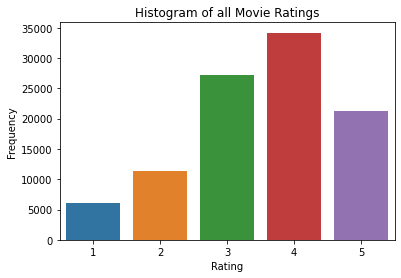

In [ ]:
y = np.bincount(data[:,2])
rat = np.arange(5)+1
fig = sb.barplot(x = rat,y = y[rat])
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of all Movie Ratings")
plt.show(fig)

And so we can see that there were more high-ratings given out than low-ratings, and that 4 stars was the most popular rating given.

###2. All Ratings from the 10 Most Popular Movies:

We can make the same plot for the 10 most popular movies, which we can parse using the calculated numrating vector:


Top 10 Movies by Number of Ratings:


,MovieTitle,NumRatings,AverageRating
MovieID,,,
50,Star Wars (1977),583.0,4.358491
258,Contact (1997),509.0,3.803536
100,Fargo (1996),508.0,4.155512
181,Return of the Jedi (1983),507.0,4.007890
294,Liar Liar (1997),485.0,3.156701
286,"English Patient, The (1996)",481.0,3.656965
288,Scream (1996),478.0,3.441423
1,Toy Story (1995),452.0,3.878319
300,Air Force One (1997),431.0,3.631090


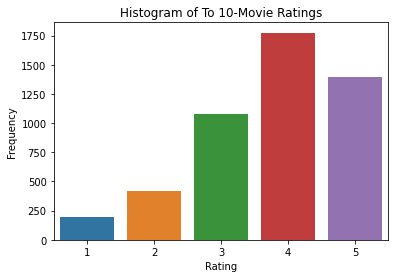

In [ ]:
top10m = movies.sort_values(by = "NumRatings",ascending=False).iloc[0:10].index.tolist()
print("Top 10 Movies by Number of Ratings:")
display(movies.sort_values(by = "NumRatings", ascending = False)[["MovieTitle","NumRatings", "AverageRating"]][0:10])
print("\n")
y = np.bincount(data[np.isin(data[:,1],top10m),2])
fig = sb.barplot(x = rat,y = y[rat])
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Top-10 Movie Ratings")
plt.show(fig)

Unsurprisingly, we can see many familiar titles in the top 10. And that the ratings are on the higher end of the spectrum compared to the distribution of all ratings.

###3. All Ratings of the Ten Best Movies:
We can take the exact same approach here to bin the ratings for the movies with the highest average rating:

Top 10 Movies By Average Rating:


,MovieTitle,AverageRating,NumRatings
MovieID,,,
814,"Great Day in Harlem, A (1994)",5.0,1.0
1599,Someone Else's America (1995),5.0,1.0
1201,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
1122,They Made Me a Criminal (1939),5.0,1.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
1293,Star Kid (1997),5.0,3.0
1500,Santa with Muscles (1996),5.0,2.0
1189,Prefontaine (1997),5.0,3.0
1536,Aiqing wansui (1994),5.0,1.0


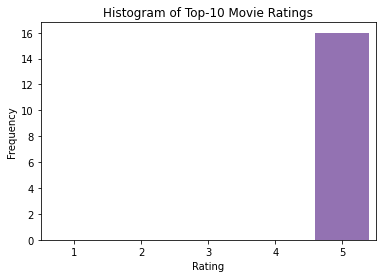

In [ ]:
top10r = movies.sort_values(by = "AverageRating",ascending=False).iloc[0:10].index.tolist()
print("Top 10 Movies By Average Rating:")
display(movies.sort_values(by = "AverageRating", ascending = False)[["MovieTitle","AverageRating","NumRatings"]][0:10])
print("\n")
y = np.bincount(data[np.isin(data[:,1],top10r),2])
fig = sb.barplot(x = rat,y = y[rat])
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Top-10 Movie Ratings")
plt.show(fig)

Unsurprisingly, we see that all of these movies have an average rating of 5.0, meaing all raters who rated this movie gave it a 5.0, However, all of these movies only have one or two raters, which will favorably bias high ratings in calculating the average.

###4. All Ratings of three movie genres (Westrn, Drama, Sci-fi):
The above code can easily be adapted for specific movie genres to bin all the ratings for a given movie type, which we can display below:

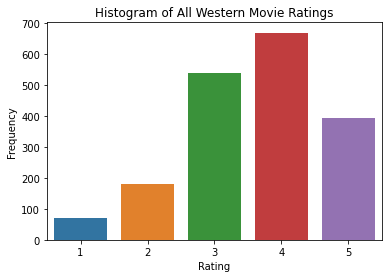

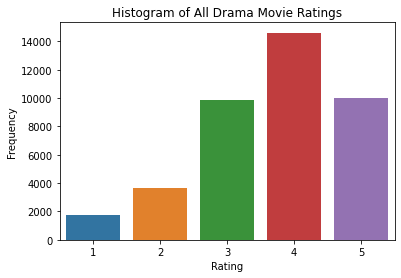

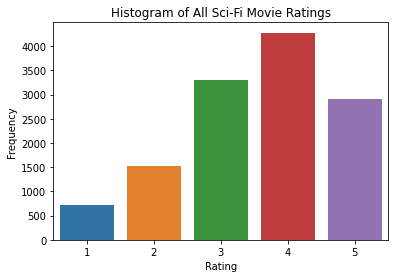

In [ ]:
def plotgenreratings(genre):
  genreidx = movies[movies[genre]==1].index.tolist()
  genreratings = data[np.isin(data[:,1],genreidx),2]
  y = np.bincount(genreratings)
  rat = np.arange(5)+1
  fig = sb.barplot(x = rat,y = y[rat])
  plt.xlabel("Rating")
  plt.ylabel("Frequency")
  plt.title("Histogram of All "+genre+" Movie Ratings")
  plt.show(fig)
  print("\n")

plotgenreratings("Western")
plotgenreratings("Drama")
plotgenreratings("Sci-Fi")

It seems that fewer people have rated Westerns and Sci-Fi movies than Drama movies, and that Westerns have comparatively fewer 5-star ratings compared to the other viewed movie genres.

Across all of these histograms, we interestingly find that the distribution of ratings is quite similar to the overall distribution of all ratings.

##Matrix Factorization

With the preliminary data investiation out of the way, we can begin to look at more sophisticated means of delving into the MoveLens data, including factorization, using the methods as outined in the project document.

###1. Homework 5 Code:
We can use stochastic gradient descent with no bias term to optimize the mean squared regularization error of the factorization $Y = U^TV$:

In [ ]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta*(reg*Ui - (Yij-np.dot(Ui,Vj))*Vj)
    pass   

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta*(reg*Vj - (Yij-np.dot(Ui,Vj))*Ui)
    pass

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0
    for i in range(len(Y)):
      idx = Y[i,0]-1
      jdx = Y[i,1]-1
      err = err + 0.5*np.power((Y[i,2]-np.dot(U[idx,:], V[jdx,:])),2)
    err = err + reg/2*(np.sum(U*U)+np.sum(V*V))
    err = err/len(Y)

    return err
    pass


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-0.5, 0.5, (M,K))
    V = np.random.uniform(-0.5, 0.5, (N,K))
    errs = np.zeros(max_epochs+1)
    errs[0] = get_err(U,V,Y,reg)
    for k in range(max_epochs):
      epochorder = np.random.permutation(len(Y))
      for idx in epochorder:
        uidx = Y[idx,0]-1
        vidx = Y[idx,1]-1
        U[uidx,:] = U[uidx,:] - grad_U(U[uidx,:], Y[idx,2], V[vidx,:], reg, eta)
        V[vidx,:] = V[vidx,:] - grad_V(V[vidx,:], Y[idx,2], U[uidx,:], reg, eta)
      errs[k+1]= get_err(U, V, Y, reg)
      if ((errs[k+1]-errs[k])/(errs[1]-errs[0]))<=eps:
        return U, V, errs[k+1]
    
    return U, V, errs[-1]
    pass

From Homework 5, we saw that the regularization $\lambda = 0.1$ had the best testing error, so that's the value we can use for our factorization under this method:

#***DO WE WANT TO DO/SHOW HYPERPARAMETER TRAINING, OR CHANGE THE TERMINATION REQUIREMENT?***
^^if we do this, we should use the hyperparameters that lead to the best performance of the one *with* the bias term (see the section below this one, since i show the performance improves with the bias temrs).

In [ ]:
print("Factorizing with ", nusers, " users, ", nmovies, " movies.")
k = 20
reg = 0.1
eta = 0.03 # learning rate

print("Executing model Training... ")
U,V, err = train_model(nusers, nmovies, K, eta, reg, Y_train)
print("Training complete. Mean Prediction Training Error: ", err)
print("Mean Prediction Error (Testing): ", get_err(U, V, Y_test))

# NOTE:
# We may want to do some additional tinkering (i.e. do hyperparam optimization,etc.)

Factorizing with  943  users,  1682  movies.
Executing model Training... 
Training complete. Mean Prediction Training Error:  0.33692687728612464
Mean Prediction Error (Testing):  0.4551768374676125


###2. Incorporating the Bias terms:

To incorporate the bias terms, we can redo the above code blocks, but include bias vectors $a$, $b$ for users and movies, respectively. The gradients for these vectors are straightforward in the stochastic update for a single point, under the loss function $f$ from Homework 5:
\begin{equation}
\partial_{a_i} f= \lambda a_i -(y_{ij}-\mu - u_i^Tv_j - a_i -b_j)
\end{equation}
\begin{equation}
\partial_{b_j} f= \lambda b_j -(y_{ij}-\mu - u_i^Tv_j - a_i -b_j)
\end{equation}
where $\mu$ is the average of all the observed ratings.

In [ ]:
def grad_U(Ui, Yij, Vj, ai, bj, mu, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta*(reg*Ui - (Yij-mu-np.dot(Ui,Vj)-ai-bj)*Vj)
    pass   

def grad_V(Vj, Yij, Ui, ai, bj, mu, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta*(reg*Vj - (Yij-mu-np.dot(Ui,Vj)-ai-bj)*Ui)
    pass

def grad_a(Ui, Yij, Vj, ai, bj, mu, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate), as well as bias terms ai, bj

    Returns the gradient of the regularized loss function with
    respect to ai, multiplied by eta.
    """
    return eta*(reg*ai-(Yij-mu-np.dot(Ui,Vj)-ai-bj))
    pass

def grad_b(Ui, Yij, Vj, ai, bj, mu, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate), as well as bias terms ai, bj

    Returns the gradient of the regularized loss function with
    respect to  bj, multiplied by eta.
    """
    return eta*(reg*bj-(Yij-mu-np.dot(Ui,Vj)-ai-bj))
    pass   

def get_err(U, V, Y, a, b, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V, as well as two bias vectors a, b.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0
    mu = np.mean(Y[:,2])
    for i in range(len(Y)):
      idx = Y[i,0]-1
      jdx = Y[i,1]-1
      err = err + 0.5*np.power((Y[i,2]-mu-np.dot(U[idx,:], V[jdx,:])-a[idx]-b[jdx]),2)
    err = err + reg/2*(np.sum(U*U)+np.sum(V*V))
    err = err/len(Y)

    return err
    pass


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij, in addition to bias vectors a, b

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, a, b, err) consisting of U, V, a, b, and the 
    unregularized MSE of the model.
    """
    U = np.random.uniform(-0.5, 0.5, (M,K))
    V = np.random.uniform(-0.5, 0.5, (N,K))
    a = np.random.uniform(-0.5, 0.5, M)
    b = np.random.uniform(-0.5, 0.5, N)
    errs = np.zeros(max_epochs+1)
    errs[0] = get_err(U,V,Y,a,b,reg)
    mu = np.mean(Y[:,2])
    for k in range(max_epochs):
      epochorder = np.random.permutation(len(Y))
      for idx in epochorder:
        uidx = Y[idx,0]-1
        vidx = Y[idx,1]-1
        U[uidx,:] = U[uidx,:] - grad_U(U[uidx,:], Y[idx,2], V[vidx,:], a[uidx], b[vidx], mu, reg, eta)
        V[vidx,:] = V[vidx,:] - grad_V(V[vidx,:], Y[idx,2], U[uidx,:], a[uidx], b[vidx], mu, reg, eta)
        a[uidx] = a[uidx] - grad_a(U[uidx,:], Y[idx,2], V[vidx,:], a[uidx], b[vidx], mu, reg, eta)
        b[vidx] = b[vidx] - grad_b(U[uidx,:], Y[idx,2], V[vidx,:], a[uidx], b[vidx], mu, reg, eta)
      errs[k+1]= get_err(U, V, Y, a, b, reg)
      if ((errs[k+1]-errs[k])/(errs[1]-errs[0]))<=eps:
        return U, V, a, b, errs[k+1]
    
    return U, V, a, b, errs[-1]
    pass

With the modifications made, it remains to train the new model, which we can look at under the same choice of parameters:

In [ ]:
print("Factorizing with ", nusers, " users, ", nmovies, " movies.")
print("Executing model Training... ")
U,V,a,b,err = train_model(nusers, nmovies, K, eta, reg, Y_train)
print("Training complete. Mean Prediction Training Error: ", err)
print("Mean Prediction Error (Testing): ", get_err(U, V, Y_test, a, b))

# NOTE:
# We may want to do some additional tinkering (i.e. do hyperparam optimization,etc.)

Factorizing with  943  users,  1682  movies.
Executing model Training... 
Training complete. Mean Prediction Training Error:  0.24916652018072138
Mean Prediction Error (Testing):  0.4188762482025738


And indeed we see under the incorporation of bias terms representing the deviation from the global bias, our training *and* testing error has improved. This means we can now look to the next part, which invovles

###3. Off-the-shelf Implementation:

We choose to use the `surprise` library which incorporates many useful matrix factorization methods. We can generate and test our matrix with the following code:

#***DO WE WANT TO DO/SHOW HYPERPARAMETER TRAINING?***

In [ ]:
!pip3 install surprise

In [ ]:
import surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

sreader = surprise.Reader(rating_scale = (1, 5.0))

strain = Dataset.load_from_df(pd.DataFrame(Y_train), sreader)
trainset = strain.build_full_trainset()
trainset.n_items=max(Y_train[:,1])

algo = SVD(n_factors = k, biased = True, lr_all = eta, reg_all = reg)
algo.fit(trainset)

'''See below section. This can instead be used if we don't care about ordering.'''
#predictions = np.zeros(len(Y_test))
#for i in range(len(Y_test)):
#  uid = Y_test[i,0]
#  iid = Y_test[i,1]
#  predictions[i] = algo.predict(uid, iid).est
#
#testmetric = 0.5*np.sum(np.power(predictions-Y_test[:,2],2))/len(Y_test)
#print("\nTest-error metric for SVD: ", testmetric)


Test-error metric for SVD:  0.413249966973112


Unfortunately, the surprise library maps ID labels as strings (even when input as integers) to internal labels, so the ordering of movie and user ids in the matrices that surprise gives us back is not preserved. 

To be specific, there are some movie ids "missing" in the training set (for instance, movie id 1678 does not appear in the training set) so the number of unique features to train over is actually smaller than 1682 (there are 1668), and therefore the resulting rows/columns from our Homework 5 SGD code never get updated, remaining as the random noise to which they were initialized.

To manipulate the output matrix from surprise and map it back into a larger matrix of the same form as our $U$, $V$, we thus have to reverse-map the suprise-ids back to the movie ids, and write these into another randomized matrix (where again the "untrained" columns and rows remain randomized, which will cause a slight discrepancy in the error calculation seen below and the prediction methods that the surprise library utilizes):

In [ ]:
U_surprise = algo.pu
V_surprise = algo.qi
a_surprise = algo.bu
b_surprise = algo.bi

U = np.random.uniform(-0.5, 0.5, (nusers,k))
V = np.random.uniform(-0.5, 0.5, (nmovies,k))
a = np.random.uniform(-0.5, 0.5, nusers)
b = np.random.uniform(-0.5, 0.5, nmovies)

for i in range(len(mapping_u)):
  idx = trainset.to_raw_uid(i)-1
  U[idx,:] = U_surprise[i,:]
  a[idx] = a_surprise[i]
for i in range(len(mapping_m)):
  idx = trainset.to_raw_iid(i)-1
  V[idx,:] = V_surprise[i,:]
  b[idx] = b_surprise[i]

testmetric = get_err(U, V, Y_test, a, b)
print("\nTest-error metric for SVD: ", testmetric)


Test-error metric for SVD:  0.41389793142430464


And so we see similar performance from the Surprise library to our SGD code from Homework 5. This leads us to

##Visualization
###1. Spatial Projection of Latent Features:

to visualize our data in 2D space after determining a higher-dimensional relationsihp from the matrix factorization, we can run SVD on $V$ from our factorization algorithm and use the leading columns to project our features into a 2D space:

In [ ]:
'''Asked on Piazza on how to do the lines below that throws an error/are problematic'''
#A, S, B = np.linalg.svd(V)
#proj = A[:,0:2]
#Uproj = np.matmul(np.transpose(proj),U)
#Vproj = np.matmul(np.transpose(proj),V)
'''They want a V-tilde thats 2x1682, but the formula they have gives us 2x20'''

##I think this is the fix, but someone else should verify:
A, S, B = np.linalg.svd(np.transpose(V))
proj = A[:, 0:2]
Uproj = np.matmul(np.transpose(proj),np.transpose(U))
Vproj = np.matmul(np.transpose(proj),np.transpose(V))
print(np.shape(Uproj))
print(np.shape(Vproj))

(20, 2) (1682, 20) (943, 20)
(2, 943)
(2, 1682)


With the projections complete, it remains to use these 2D representations to make some informative visualizations!

###2a. Ten Movies of Choice by the Team:

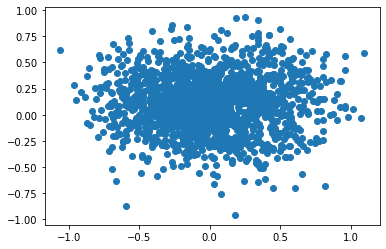

In [ ]:
#Naive scatterplot for giggles
plt.scatter(Vproj[0,:],Vproj[1,:])

#A particular movie will have a point at (Vproj[0,i],Vproj[1,i]), where i = (movieid-1)
#Can also use the rest of the calcualted quantities above to your heart's desire

_insert analysis_

###2b. Top 10 Movies by Number of Ratings:

_insert analysis_

###2c. Top 10 Movies by Average Rating:

_insert analysis_

###2d. Top 10 Movies per Genre for three Genres:

_insert analysis_